In [6]:
import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=False)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Total Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df).sort_values(by="Ratio", ascending=False)
    return missing_df


def check_df(dataframe, head=5, tail=5):
    print("*" * 70)
    print(" Shape ".center(70, "*"))
    print("*" * 70)
    print(dataframe.shape)

    print("*" * 70)
    print(" Types ".center(70, "*"))
    print("*" * 70)
    print(dataframe.dtypes)

    print("*" * 70)
    print(" Head ".center(70, "*"))
    print("*" * 70)
    print(dataframe.head(head))

    print("*" * 70)
    print(" Tail ".center(70, "*"))
    print("*" * 70)
    print(dataframe.tail(tail))

    print("*" * 70)
    print(" NA ".center(70, "*"))
    print("*" * 70)
    print(missing_values_analysis(dataframe))

    print("*" * 70)
    print(" Quantiles ".center(70, "*"))
    print("*" * 70)
    print(dataframe.describe([.01, .05, .1, .5, .9, .95, .99]).T)

    print("*" * 70)
    print(" Duplicate Rows ".center(70, "*"))
    print("*" * 70)
    print(dataframe.duplicated().sum())

    print("*" * 70)
    print(" Uniques ".center(70, "*"))
    print("*" * 70)
    print(dataframe.nunique())

In [16]:
train = pd.read_csv("./data/train.csv").iloc[:,1:]
test = pd.read_csv("./data/test_x.csv").iloc[:,1:]

In [17]:
test.head()

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,Erkek,51-60,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,365331.930346,Köy veya Kasaba,Giyim,5566.587664,15.442635,Etmiyor,19.646460
1,Erkek,41-50,Bekar,Lise Mezunu,İşsiz veya Düzenli Bir İşi Yok,414899.236174,Büyük Şehir,Spor Malzemeleri,6756.766203,14.957246,Etmiyor,19.675863
2,Kadın,>60,Evli,Eğitimsiz,İşsiz veya Düzenli Bir İşi Yok,152825.872271,Küçük Şehir,Giyim,4493.915682,10.907930,Etmiyor,46.904518
3,Kadın,51-60,Evli,Doktora Ötesi,Düzenli ve Ücretli Bir İşi Var,489052.908472,Köy veya Kasaba,Kozmetik,42670.646595,32.333021,Etmiyor,48.083609
4,Erkek,18-30,Evli,Yüksek Lisans Mezunu,Kendi İşinin Sahibi,323635.711534,Küçük Şehir,Giyim,5959.266948,4.519968,Etmiyor,12.752491


## Feature Engineering Ideas:
- Medeni durum-Eğitim düzeyi ikilisi
- Medeni durum-İstihdam Durumu ikilisi
- İstihdam Durumu-Eğitim düzeyi ikilisi
- Eğitim düzeyi-Eğitime devam etme durumu

In [4]:
check_df(train)

**********************************************************************
******************************* Shape ********************************
**********************************************************************
(5460, 14)
**********************************************************************
******************************* Types ********************************
**********************************************************************
index                                           int64
Cinsiyet                                       object
Yaş Grubu                                      object
Medeni Durum                                   object
Eğitim Düzeyi                                  object
İstihdam Durumu                                object
Yıllık Ortalama Gelir                         float64
Yaşadığı Şehir                                 object
En Çok İlgilendiği Ürün Grubu                  object
Yıllık Ortalama Satın Alım Miktarı            float64
Yıllık Ortalama Sipariş

In [18]:
train.shape

(5460, 13)

In [19]:
test.shape

(2340, 12)

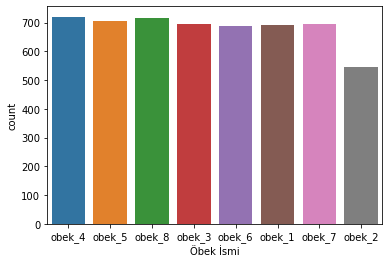

In [10]:
sns.countplot(x=train["Öbek İsmi"]);

In [20]:
app_train = train.copy()
app_test = test.copy()

In [23]:
train.head(1)

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,obek_4,102.936904


In [22]:
test.head(1)

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,Erkek,51-60,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,365331.930346,Köy veya Kasaba,Giyim,5566.587664,15.442635,Etmiyor,19.64646


In [36]:
train_ohe_cols = list(app_train.columns[:5]) + list(app_train.columns[6:8]) + list(app_train.columns[10:11])
test_ohe_cols = list(app_test.columns[:5]) + list(app_test.columns[6:8]) + list(app_test.columns[10:11])

In [37]:
set(train_ohe_cols)

{'Cinsiyet',
 'En Çok İlgilendiği Ürün Grubu',
 'Eğitim Düzeyi',
 'Eğitime Devam Etme Durumu',
 'Medeni Durum',
 'Yaş Grubu',
 'Yaşadığı Şehir',
 'İstihdam Durumu'}

In [38]:
set(train_ohe_cols) - set(test_ohe_cols)

set()

In [39]:
app_train_encode = pd.get_dummies(app_train, columns=train_ohe_cols)
app_test_encode = pd.get_dummies(app_test, columns=test_ohe_cols)

In [40]:
app_train_encode.head()

,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Cinsiyet_Erkek,Cinsiyet_Kadın,Yaş Grubu_18-30,Yaş Grubu_31-40,Yaş Grubu_41-50,...,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Elektronik ve Teknolojik Ürünler,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Ediyor,Eğitime Devam Etme Durumu_Etmiyor
0,748266.440879,32010.900881,37.310644,obek_4,102.936904,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,246298.609605,4145.729891,11.554851,obek_5,82.176053,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2,268582.732360,9924.379414,55.353236,obek_8,141.661426,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
3,327721.837865,6417.780714,15.417239,obek_3,17.097397,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,397431.626948,7886.663061,14.689837,obek_3,20.470459,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [70]:
from sklearn.model_selection import KFold
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score, recall_score, precision_score, accuracy_score
import re




y = app_train_encode["Öbek İsmi"]
X = app_train_encode.drop(columns=["Öbek İsmi"])
X = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

auc_errs = []
ap_errs = []
prec_errs = []
recall_errs = []
f1_errs = []
acc_scores = []

models = []

kf = KFold(n_splits=10)

for split_train, split_val in list(kf.split(X)):
    
    split_train = X.index[split_train]
    split_val = X.index[split_val]
    
    X_train, y_train = X.loc[split_train], y.loc[split_train]
    X_val, y_val = X.loc[split_val], y.loc[split_val]
    print("Train shape:", X_train.shape, "|", "Val Shape:", X_val.shape)
    print("Positive Count in Val Split:", y_val.sum())

    model = CatBoostClassifier(iterations=1000,  # You can adjust parameters
                               learning_rate=0.1,
                               depth=6,
                               loss_function='MultiClass',
                               random_state=42)
    
    model.fit(X_train, y_train, eval_set=[(X_val, y_val), (X_train, y_train)], early_stopping_rounds=100, verbose=200)
    
    preds = model.predict(X_val)
    pred_probas = model.predict_proba(X_val)[:,1]

    print("Positive Count in Predictions:", preds.sum())
    
    acc = accuracy_score(y_val, preds)
    print("Accuracy: ", acc)
    acc_scores.append(acc)
    
    f1_err = f1_score(y_val, preds, average='macro')
    print("Fold F1: ", f1_err)
    f1_errs.append(f1_err)

    prec_err = precision_score(y_val, preds, average='macro')
    print("Fold Precision: ", prec_err)
    prec_errs.append(prec_err)

    recall_err = recall_score(y_val, preds, average='macro')
    print("Fold Recall: ", recall_err)
    recall_errs.append(recall_err)
    
    models.append(model)
    
    print("\n", "*"*70, "\n")

import plotly.express as px
importance = [model.feature_importances_ for model in models]

f_importance = pd.concat([pd.Series(X.columns.to_list(),name='Feature'),
                        pd.Series(np.mean(importance,axis=0),name="Importance")],
                        axis=1).sort_values(by='Importance',
                                            ascending=True)

fig = px.bar(f_importance.tail(20),x='Importance',y='Feature')
fig.update_layout(
    title_text="First 20 Important Features - CatBoost Average of Folds"
)
fig.show()

    


Train shape: (4914, 37) | Val Shape: (546, 37)
Positive Count in Val Split: obek_4obek_5obek_8obek_3obek_3obek_8obek_3obek_5obek_3obek_6obek_5obek_1obek_7obek_3obek_7obek_5obek_7obek_6obek_6obek_6obek_5obek_3obek_8obek_8obek_4obek_8obek_8obek_6obek_8obek_6obek_7obek_8obek_3obek_1obek_7obek_5obek_6obek_4obek_3obek_5obek_7obek_8obek_6obek_1obek_4obek_6obek_5obek_5obek_5obek_5obek_8obek_6obek_8obek_6obek_6obek_5obek_6obek_7obek_6obek_4obek_7obek_5obek_6obek_4obek_3obek_3obek_4obek_2obek_4obek_7obek_2obek_5obek_6obek_4obek_8obek_1obek_1obek_2obek_8obek_6obek_5obek_7obek_2obek_1obek_4obek_4obek_4obek_6obek_1obek_1obek_1obek_3obek_1obek_1obek_8obek_5obek_2obek_6obek_3obek_2obek_7obek_5obek_7obek_2obek_8obek_4obek_4obek_7obek_5obek_1obek_4obek_5obek_3obek_4obek_1obek_3obek_7obek_6obek_3obek_6obek_6obek_5obek_8obek_5obek_6obek_4obek_5obek_6obek_6obek_4obek_7obek_6obek_5obek_1obek_4obek_5obek_6obek_5obek_5obek_2obek_8obek_8obek_5obek_6obek_4obek_7obek_3obek_2obek_8obek_7obek_3obek_1obek_3obek_2

In [48]:
sample = pd.read_csv("./data/sample_submission.csv")
sample.head()

,id,Öbek İsmi
0,0,obek_3
1,1,obek_2
2,2,obek_1


In [72]:
app_test_encode = app_test_encode.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))


In [73]:
class_labels = model.classes_

# Predict probabilities for the test data
model_preds = [model.predict_proba(app_test_encode) for model in models]

# Calculate the mean predicted probabilities for each class across models
average_probs = np.mean(model_preds, axis=0)

# Find the class index with the highest probability for each sample
predicted_classes = np.argmax(average_probs, axis=1)

# Map class indices to class labels
predicted_labels = [class_labels[class_idx] for class_idx in predicted_classes]


In [52]:
user_id = pd.read_csv("./data/test_x.csv").iloc[:,0]
user_id

0          0
1          1
2          2
3          3
4          4
        ... 
2335    2335
2336    2336
2337    2337
2338    2338
2339    2339
Name: index, Length: 2340, dtype: int64

In [74]:
sample_submission = pd.DataFrame()
sample_submission['id'] = user_id
sample_submission['Öbek İsmi'] = predicted_labels

sample_submission.head()

,id,Öbek İsmi
0,0,obek_3
1,1,obek_3
2,2,obek_2
3,3,obek_6
4,4,obek_1


In [75]:
sample_submission.shape

(2340, 2)

In [76]:
sample_submission.to_csv("base_catboost.csv", index=False)